In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as plt

In [111]:
df=pd.read_csv('C:/Users/91861/Downloads/Customers.csv').head(100)
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
95,96,Male,24,80000,52,Artist,10,1
96,97,Female,47,2000,47,Artist,0,1
97,98,Female,27,67000,50,Artist,0,2
98,99,Male,48,58000,42,Doctor,1,2


In [113]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                1
Work Experience           0
Family Size               0
dtype: int64

<Axes: xlabel='Age', ylabel='Annual Income ($)'>

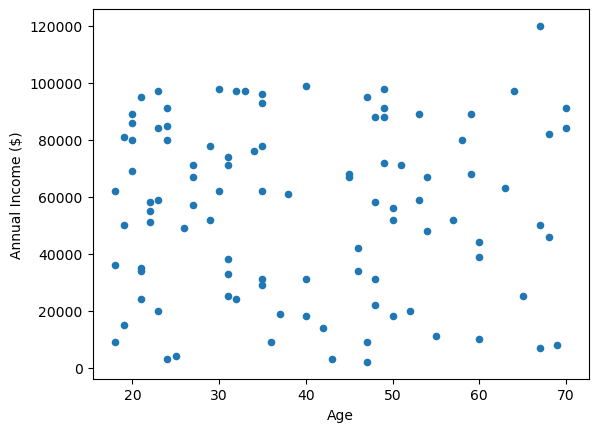

In [115]:
df.plot(x='Age',
        y='Annual Income ($)',kind='scatter'
       )

In [116]:
x=df[['Age','Annual Income ($)']]

In [119]:
km=KMeans(n_clusters=3)
df['clusters']=km.fit_predict(x)

C:\Users\91861\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [121]:
df['clusters']=df['clusters'].astype('category')

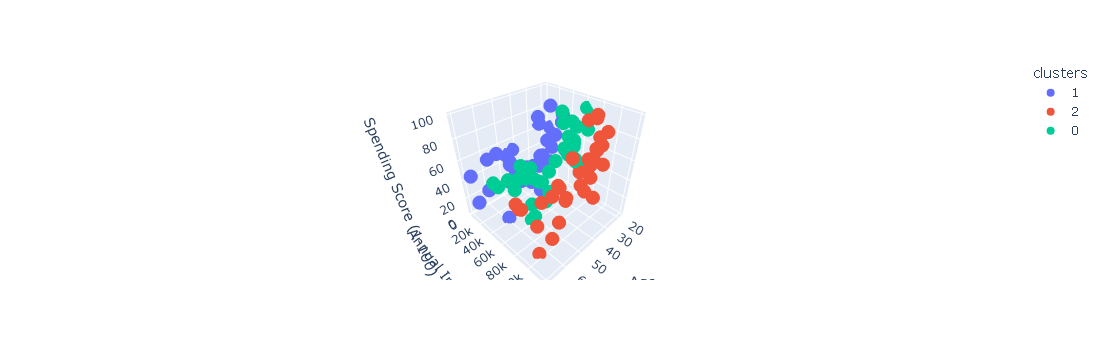

In [123]:
plt.scatter_3d(df,x='Age',
               y='Annual Income ($)',
               z='Spending Score (1-100)',
               color='clusters'
               )

In [129]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [242]:
df=pd.read_csv('C:/Users/91861/Downloads/Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [244]:
x=df.iloc[:,[3,4]].values
x 

array([[ 15000,     39],
       [ 35000,     81],
       [ 86000,      6],
       ...,
       [ 90961,     14],
       [182109,      4],
       [110610,     52]], dtype=int64)

In [246]:
li=[]
for i in range(1,11):
    mod=KMeans(n_clusters=i,random_state=42,n_init=10,init='k-means++')
    mod.fit(x)
    li.append(mod.inertia_)

In [247]:
li

[4182119887611.461,
 1152822121990.7783,
 595251259192.2795,
 363555111097.2102,
 217654380077.12054,
 140484356653.5406,
 108130268910.60028,
 84503669460.66571,
 66452547444.74461,
 52549455632.82588]

In [248]:
#Plotting of Clusters Using Elbow Method

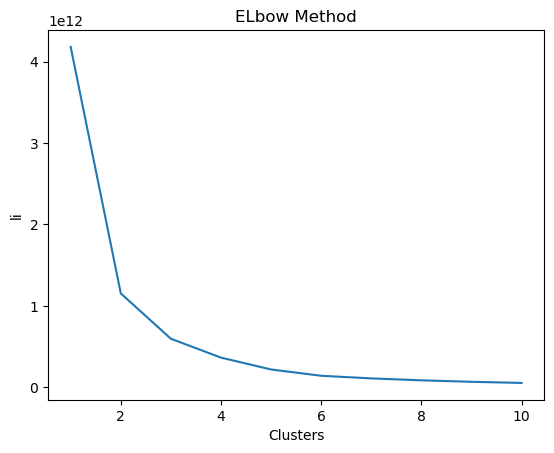

(Text(24.000000000000007, 0.5, 'li'), Text(0.5, 1.0, 'ELbow Method'), None)

In [249]:
plt.plot(range(1,11),li)
plt.xlabel('Clusters')
plt.ylabel('li'),plt.title('ELbow Method'),plt.show()

In [268]:
#It seems Like to use 5 clusters for Kmeans 

In [262]:
mod=KMeans(n_clusters=5,random_state=42,n_init=10,init='k-means++')
x_mean=mod.fit_predict(x)
x_mean

array([2, 2, 4, ..., 4, 3, 4])

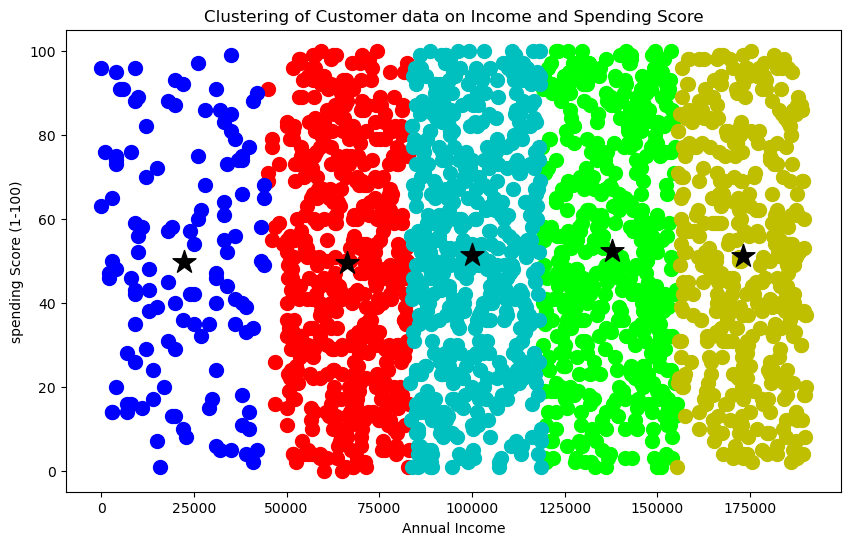

In [272]:
plt.figure(figsize=(10,6))
plt.scatter(x[x_mean==0,0],x[x_mean==0,1],color='lime',label='Cluster 1',s=100)
plt.scatter(x[x_mean==1,0],x[x_mean==1,1],color='r',label='Cluster 1',s=100)
plt.scatter(x[x_mean==2,0],x[x_mean==2,1],color='b',label='Cluster 1',s=100)
plt.scatter(x[x_mean==3,0],x[x_mean==3,1],color='y',label='Cluster 1',s=100)
plt.scatter(x[x_mean==4,0],x[x_mean==4,1],color='c',label='Cluster 1',s=100)
plt.scatter(mod.cluster_centers_[:,0],mod.cluster_centers_[:,1],s=300,marker='*',c='k')
plt.xlabel('Annual Income')
plt.ylabel('spending Score (1-100)')
plt.title('Clustering of Customer data on Income and Spending Score')
plt.show()
